In [1]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance_statistical_parity,calculate_performance_equalized_odds,calculate_performance_equal_opportunity,calculate_performance_predictive_parity,calculate_performance_predictive_equality,calculate_performance_treatment_equality
from sklearn import preprocessing
from sklearn import svm
from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_law():
    df = pd.read_csv('data/law_school_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'pass_bar'
    filename = "SVM.law.abroca.pdf"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
def load_student_academics():
    df = pd.read_csv('data/student_aca_clean.csv')    
    protected_attribute = 'ge'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "SVM.student-academics.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Good-and-higher" else 0 for v in df['class']]
    #Label sex
    df['ge']=["Female" if v == "F" else "Male" for v in df['ge']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
def load_xAPI_Edu():
    df = pd.read_csv('data/xAPI-Edu-Data.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "SVM.xAPI-Edu-Data.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Medium-High" else 0 for v in df['Class']]
    #Label sex
    df['gender']=["Female" if v == "F" else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [5]:
def load_student_mat():
    df = pd.read_csv('data/student_mat_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "SVM.student-mat.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Pass" else 0 for v in df['Class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [6]:
def load_student_por():
    df = pd.read_csv('data/student_por_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "SVM.student-por.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Pass" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def load_pisa():
    df = pd.read_csv('data/pisa_clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'readingScore'
    filename = "SVM.pisa.abroca.pdf"    
    
    #Label class
    df['readingScore']=[1 if v == 'High' else 0 for v in df['readingScore']]
    #Label sex
    df['gender']=["Female" if v == 0 else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [8]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run SVM model
    SVM = svm.SVC(probability=True)
    SVM.fit(X_train,y_train)
    y_predicts = SVM.predict(X_test)
    y_pred_probs = SVM.predict_proba(X_test)
        
    #Print measures
        
    print("Statistical parity:")
    print(calculate_performance_statistical_parity(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
         
    print("Equal opportunity")
    print(calculate_performance_equal_opportunity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Equalized odds")
    print(calculate_performance_equalized_odds(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
         
    print("Predictive parity")
    print(calculate_performance_predictive_parity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Predictive equality")
    print(calculate_performance_predictive_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Treatment equality")
    print(calculate_performance_treatment_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
    
    
    # 
    
    #make predictions
    X_test['pred_proba'] = SVM.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [9]:
#Main function
def run_eval(dataset):
    if dataset == 'law':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'pisa':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_pisa()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'student-academics':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_academics()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                            
    if dataset == 'student-mat':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'student-por':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    if dataset == 'xAPI-Edu':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_xAPI_Edu()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    

Statistical parity:
{'balanced_accuracy': 0.5028819532209414, 'accuracy': 0.8926282051282052, 'fairness': 0.005154639175257714, 'Positive_prot_pred': 0.9948453608247423, 'Positive_non_prot_pred': 1.0, 'Negative_prot_pred': 0.005154639175257732, 'Negative_non_prot_pred': 0.0}
Equal opportunity
{'balanced_accuracy': 0.5028819532209414, 'accuracy': 0.8926282051282052, 'fairness': 0.0014064697609000865, 'TPR_protected': 0.9985935302390999, 'TPR_non_protected': 1.0, 'TNR_protected': 0.015444015444015444, 'TNR_non_protected': 0.0}
Equalized odds
{'balanced_accuracy': 0.5028819532209414, 'accuracy': 0.8926282051282052, 'fairness': 0.01685048520491553, 'TPR_protected': 0.9985935302390999, 'TPR_non_protected': 1.0, 'TNR_protected': 0.015444015444015444, 'TNR_non_protected': 0.0}
Predictive parity
{'balanced_accuracy': 0.5028819532209414, 'accuracy': 0.8926282051282052, 'fairness': 0.1856908299004041, 'TPR_protected': 0.9985935302390999, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0154440154440

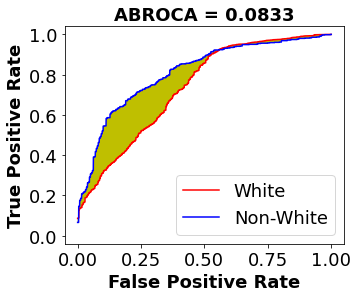

ABROCA: 0.08334519468547709


In [10]:
run_eval('law')

Statistical parity:
{'balanced_accuracy': 0.502588424437299, 'accuracy': 0.6095890410958904, 'fairness': -0.002225874546492368, 'Positive_prot_pred': 0.9942418426103646, 'Positive_non_prot_pred': 0.9920159680638723, 'Negative_prot_pred': 0.005758157389635317, 'Negative_non_prot_pred': 0.007984031936127744}
Equal opportunity
{'balanced_accuracy': 0.502588424437299, 'accuracy': 0.6095890410958904, 'fairness': 0.004321665881860559, 'TPR_protected': 0.9971014492753624, 'TPR_non_protected': 0.9927797833935018, 'TNR_protected': 0.011363636363636364, 'TNR_non_protected': 0.008928571428571428}
Equalized odds
{'balanced_accuracy': 0.502588424437299, 'accuracy': 0.6095890410958904, 'fairness': 0.006756730816925495, 'TPR_protected': 0.9971014492753624, 'TPR_non_protected': 0.9927797833935018, 'TNR_protected': 0.011363636363636364, 'TNR_non_protected': 0.008928571428571428}
Predictive parity
{'balanced_accuracy': 0.502588424437299, 'accuracy': 0.6095890410958904, 'fairness': 0.11077274457556152, '

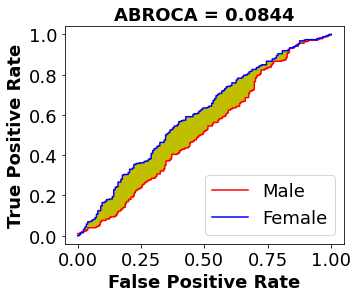

ABROCA: 0.08438729791823449


In [11]:
run_eval('pisa')

Statistical parity:
{'balanced_accuracy': 0.625, 'accuracy': 0.925, 'fairness': 0.052631578947368474, 'Positive_prot_pred': 0.9473684210526315, 'Positive_non_prot_pred': 1.0, 'Negative_prot_pred': 0.05263157894736842, 'Negative_non_prot_pred': 0.0}
Equal opportunity
{'balanced_accuracy': 0.625, 'accuracy': 0.925, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.5, 'TNR_non_protected': 0.0}
Equalized odds
{'balanced_accuracy': 0.625, 'accuracy': 0.925, 'fairness': 0.5, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.5, 'TNR_non_protected': 0.0}
Predictive parity
{'balanced_accuracy': 0.625, 'accuracy': 0.925, 'fairness': 0.03968253968253965, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.5, 'TNR_non_protected': 0.0}
Predictive equality
{'balanced_accuracy': 0.625, 'accuracy': 0.925, 'fairness': 0.5, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.5, 'TNR_non_protected': 0.0}
Treatment equality
{

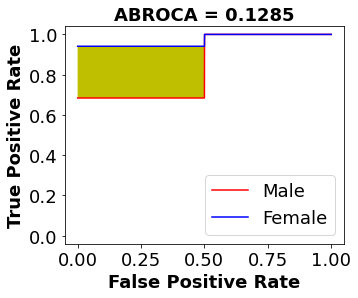

ABROCA: 0.12848297213623355


In [12]:
run_eval('student-academics')

Statistical parity:
{'balanced_accuracy': 0.8570577724836212, 'accuracy': 0.8739495798319328, 'fairness': 0.1687394007914076, 'Positive_prot_pred': 0.5689655172413793, 'Positive_non_prot_pred': 0.7377049180327869, 'Negative_prot_pred': 0.43103448275862066, 'Negative_non_prot_pred': 0.26229508196721313}
Equal opportunity
{'balanced_accuracy': 0.8570577724836212, 'accuracy': 0.8739495798319328, 'fairness': 0.04915514592933945, 'TPR_protected': 0.9032258064516129, 'TPR_non_protected': 0.9523809523809523, 'TNR_protected': 0.8148148148148148, 'TNR_non_protected': 0.7368421052631579}
Equalized odds
{'balanced_accuracy': 0.8570577724836212, 'accuracy': 0.8739495798319328, 'fairness': 0.12712785548099637, 'TPR_protected': 0.9032258064516129, 'TPR_non_protected': 0.9523809523809523, 'TNR_protected': 0.8148148148148148, 'TNR_non_protected': 0.7368421052631579}
Predictive parity
{'balanced_accuracy': 0.8570577724836212, 'accuracy': 0.8739495798319328, 'fairness': 0.04040404040404033, 'TPR_protect

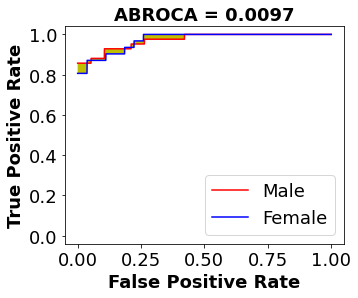

ABROCA: 0.009717414034760213


In [13]:
run_eval('student-mat')

Statistical parity:
{'balanced_accuracy': 0.7440828402366864, 'accuracy': 0.9230769230769231, 'fairness': 0.015077060531605957, 'Positive_prot_pred': 0.9173553719008265, 'Positive_non_prot_pred': 0.9324324324324325, 'Negative_prot_pred': 0.08264462809917356, 'Negative_non_prot_pred': 0.06756756756756757}
Equal opportunity
{'balanced_accuracy': 0.7440828402366864, 'accuracy': 0.9230769230769231, 'fairness': 0.01834862385321101, 'TPR_protected': 0.981651376146789, 'TPR_non_protected': 1.0, 'TNR_protected': 0.6666666666666666, 'TNR_non_protected': 0.35714285714285715}
Equalized odds
{'balanced_accuracy': 0.7440828402366864, 'accuracy': 0.9230769230769231, 'fairness': 0.3278724333770205, 'TPR_protected': 0.981651376146789, 'TPR_non_protected': 1.0, 'TNR_protected': 0.6666666666666666, 'TNR_non_protected': 0.35714285714285715}
Predictive parity
{'balanced_accuracy': 0.7440828402366864, 'accuracy': 0.9230769230769231, 'fairness': 0.09439874657265968, 'TPR_protected': 0.981651376146789, 'TPR_

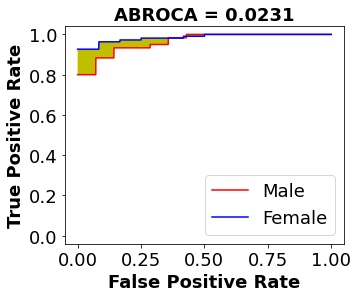

ABROCA: 0.023128094416857262


In [14]:
run_eval('student-por')

Statistical parity:
{'balanced_accuracy': 0.8505050505050504, 'accuracy': 0.8611111111111112, 'fairness': -0.22088177231849082, 'Positive_prot_pred': 0.8085106382978723, 'Positive_non_prot_pred': 0.5876288659793815, 'Negative_prot_pred': 0.19148936170212766, 'Negative_non_prot_pred': 0.41237113402061853}
Equal opportunity
{'balanced_accuracy': 0.8505050505050504, 'accuracy': 0.8611111111111112, 'fairness': 0.03076923076923077, 'TPR_protected': 0.8974358974358975, 'TPR_non_protected': 0.8666666666666667, 'TNR_protected': 0.625, 'TNR_non_protected': 0.8648648648648649}
Equalized odds
{'balanced_accuracy': 0.8505050505050504, 'accuracy': 0.8611111111111112, 'fairness': 0.2706340956340957, 'TPR_protected': 0.8974358974358975, 'TPR_non_protected': 0.8666666666666667, 'TNR_protected': 0.625, 'TNR_non_protected': 0.8648648648648649}
Predictive parity
{'balanced_accuracy': 0.8505050505050504, 'accuracy': 0.8611111111111112, 'fairness': 0.00877192982456143, 'TPR_protected': 0.8974358974358975, 

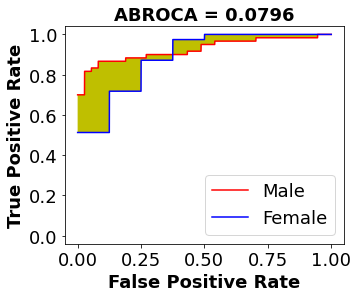

ABROCA: 0.079579960765892


In [15]:
run_eval('xAPI-Edu')